Require Pyton SDK "google-generativeai" package to connected Gemini API


In [1]:
# !pip install google-genai


In [2]:
!pip install -q -U google-generativeai

In [3]:
import google.generativeai as genai
import pathlib
import textwrap
from IPython.display import display
from IPython.display import Markdown

In [4]:
def to_markdown(text):
  text = text.replace('.',' *')
  return Markdown(textwrap.indent(text,'> ', predicate=lambda _: True))

input_text = "this is a . sample text with bullet points."
result = to_markdown(input_text)
display(result)


> this is a  * sample text with bullet points *

In [5]:
from google.colab import userdata

In [6]:
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

In [7]:
genai.configure(api_key=GOOGLE_API_KEY)

In [8]:
# for model in genai.list_models():
#   print(model)

In [9]:
for model in genai.list_models():
  if 'generateContent' in model.supported_generation_methods:
    print(model.name)

models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-2.5-pro-exp-03-25
models/gemini-2.5-pro-preview-03-25
models/gemini-2.5-flash-preview-04-17
models/gemini-2.5-flash-preview-05-20
models/gemini-2.5-flash-preview-04-17-thinking
models/gemini-2.5-pro-preview-05-06
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-preview-image-generation
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-fl

### Genrate text from text inputs



In [10]:
model = genai.GenerativeModel('gemini-1.5-flash-latest')

In [11]:
response = model.generate_content("what is life?")

In [12]:
to_markdown(response.text)

> There's no single, universally accepted definition of life *  It's a complex concept that scientists continue to debate * However, most definitions incorporate several key characteristics, often considered a combination of the following:
> 
> * **Organization:** Living things are highly organized, with complex structures at multiple levels (cells, tissues, organs, etc *) *
> * **Metabolism:** Living things acquire and use energy to maintain themselves and grow *  This involves processes like respiration and digestion *
> * **Growth and Development:** Living things increase in size and complexity over time *
> * **Adaptation:** Living things evolve over generations to better suit their environment *
> * **Response to Stimuli:** Living things react to changes in their environment *
> * **Reproduction:** Living things create new organisms similar to themselves *
> * **Homeostasis:** Living things maintain a stable internal environment despite external changes *
> 
> 
> It's important to note that some things might exhibit some of these characteristics but not all *  Viruses, for example, reproduce and adapt, but they lack independent metabolism and are generally considered non-living *  The definition of life remains a fascinating and ongoing area of scientific inquiry *


In [13]:
response.candidates

[content {
  parts {
    text: "There\'s no single, universally accepted definition of life.  It\'s a complex concept that scientists continue to debate. However, most definitions incorporate several key characteristics, often considered a combination of the following:\n\n* **Organization:** Living things are highly organized, with complex structures at multiple levels (cells, tissues, organs, etc.).\n* **Metabolism:** Living things acquire and use energy to maintain themselves and grow.  This involves processes like respiration and digestion.\n* **Growth and Development:** Living things increase in size and complexity over time.\n* **Adaptation:** Living things evolve over generations to better suit their environment.\n* **Response to Stimuli:** Living things react to changes in their environment.\n* **Reproduction:** Living things create new organisms similar to themselves.\n* **Homeostasis:** Living things maintain a stable internal environment despite external changes.\n\n\nIt\'s i

In [14]:
print(response.prompt_feedback)

In [16]:
response = model.generate_content("what is life?", stream=True)
for chunks in response:
  print(chunks.text)
  print("_"*80)

There
________________________________________________________________________________
's no single, universally accepted definition of life.  It's a
________________________________________________________________________________
 complex concept that scientists continue to debate.  However, most definitions include some or
________________________________________________________________________________
 all of these characteristics:

* **Organization:** Living things are highly organized, with complex structures at multiple levels (from atoms to cells to organisms).
*
________________________________________________________________________________
 **Metabolism:** Living things take in energy and materials from their environment and use them to maintain themselves, grow, and reproduce. This involves a complex network of
________________________________________________________________________________
 chemical reactions.
* **Growth and Development:** Living things increase in size and

In [17]:

!curl -o image.jpg https://www.shutterstock.com/image-photo/fried-salmon-steak-cooked-green-600nw-2489026949.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  104k  100  104k    0     0   664k      0 --:--:-- --:--:-- --:--:--  666k


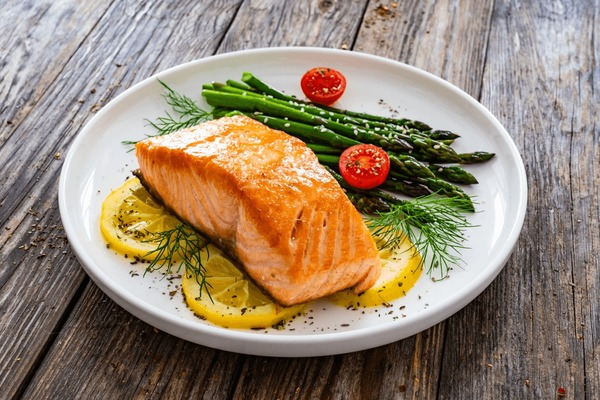

In [18]:
import PIL.Image

img = PIL.Image.open('image.jpg')
img

In [19]:
model2 = genai.GenerativeModel('gemini-1.5-flash')

In [20]:
response = model2.generate_content(img)

In [21]:
response.text

"Here's a description of the image:\n\nHigh-angle, close-up view of a plated meal featuring a pan-seared salmon fillet as the centerpiece.\xa0\n\n\nHere's a breakdown of the image's components:\n\n* **Salmon:** A thick, juicy-looking piece of salmon is cooked to a light golden brown, showcasing its flaky texture. It's positioned slightly off-center on the plate.\n\n* **Asparagus:** A bunch of roasted asparagus spears, seasoned with what looks like sesame seeds, are arranged behind and slightly under the salmon.  They appear tender-crisp.\n\n* **Lemon:** Slices of lemon are artfully placed around the salmon, providing a pop of color and a suggestion of acidity.\n\n* **Cherry Tomatoes:** Two halved cherry tomatoes add a touch of vibrant red to the plate's color scheme.\n\n* **Dill:** Fresh dill sprigs are scattered around the plate, adding a touch of green and suggesting a fresh, herbaceous flavor profile.\n\n* **Plate:** A simple, round, white plate serves as the backdrop, enhancing the

In [27]:
model3 = genai.GenerativeModel('gemini-1.5-flash-latest')

In [28]:
model3.generate_content("tell me store about avengers ?").text

"The Avengers story is a sprawling saga spanning decades of comic books and culminating in a massively successful cinematic universe.  At its core, it's about a team of extraordinary individuals who come together to protect Earth from threats too large for any one hero to handle.  Here's a breakdown:\n\n**The Origin:**  The Avengers weren't formed overnight.  The team's initial incarnation in the comics stemmed from the individual journeys of its founding members:\n\n* **Iron Man (Tony Stark):** A genius inventor and billionaire playboy who builds a powerful suit of armor to escape captivity and fight injustice.\n* **Thor:** The Norse God of Thunder, banished to Earth by his father Odin to learn humility.\n* **Hulk (Bruce Banner):** A brilliant scientist who transforms into a raging green monster when enraged.\n* **Ant-Man (Hank Pym):** A scientist who invents technology to shrink and grow in size.  Later, Scott Lang takes up the mantle.\n* **Wasp (Janet Van Dyne):** Hank Pym's wife, a

In [36]:
response = model3.generate_content(
    "tell me store about avengers ?",
    generation_config=genai.types.GenerationConfig(
        candidate_count=1,
        stop_sequences=["x"],
        max_output_tokens=200,
        temperature=0.1
    )
)

In [37]:
response.text

"The Avengers story is a sprawling saga, best understood in phases, though there are many interconnected threads.  Here's a summary broken down:\n\n**Phase 1: The Origin Stories (2008-2012)**\n\nThis phase focuses on introducing the core Avengers individually.  Each gets their own film:\n\n* **Iron Man (2008):**  Introduces Tony Stark, a billionaire genius who builds a powerful suit of armor and becomes Iron Man.\n* **The Incredible Hulk (2008):**  Focuses on Bruce Banner, who transforms into the Hulk when angry.  This film is somewhat less connected to the overall MCU than the others.\n* **Iron Man 2 (2010):**  E"



### Manage chat session in Gimini


In [38]:
model3

genai.GenerativeModel(
    model_name='models/gemini-1.5-flash-latest',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
    cached_content=None
)

In [39]:
chat = model3.start_chat(history=[])

In [40]:
chat

ChatSession(
    model=genai.GenerativeModel(
        model_name='models/gemini-1.5-flash-latest',
        generation_config={},
        safety_settings={},
        tools=None,
        system_instruction=None,
        cached_content=None
    ),
    history=[]
)

In [45]:
response = chat.send_message("what is Generative AI used for")

In [46]:
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "Generative AI has a rapidly expanding range of applications across many industries. Here are some key examples:\n\n**Creative Industries:**\n\n* **Content creation:**  Generating marketing copy, articles, scripts, social media posts, and even books.\n* **Art and design:**  Creating images, music, and other forms of art, assisting designers with ideation and prototyping.\n* **Game development:**  Generating levels, characters, and storylines.\n* **Film and animation:**  Creating realistic or stylized visuals, generating background assets.\n\n**Technology and Engineering:**\n\n* **Software development:**  Generating code snippets, assisting with debugging, and automating certain aspects of software engineering.\n* **Drug discovery:**  Designing new molecules a

In [47]:
chat.history

[parts {
   text: "what is Generative AI"
 }
 role: "user",
 parts {
   text: "Generative AI is a type of artificial intelligence that can create new content, rather than just analyze or classify existing data.  Instead of simply finding patterns in data, it *generates* new data that resembles the data it was trained on.  This new data can take many forms, including:\n\n* **Text:**  Think of tools like ChatGPT, Bard, or Jasper. These can write stories, articles, poems, code, scripts, musical pieces, email, letters, etc.\n* **Images:**  Tools like DALL-E 2, Midjourney, and Stable Diffusion can create realistic or stylized images from text descriptions.\n* **Audio:**  Generative AI can compose music, create sound effects, and even generate realistic voices.\n* **Video:**  While still in its early stages, generative AI is starting to create short videos.\n* **3D models:**  AI is being used to design and generate three-dimensional objects.\n\n\nThe key underlying mechanism is usually a neu

### counnts token

In [48]:
model3.count_tokens("Generative AI has a rapidly expanding range of applications across many industries. Here are some key examples:\n\n**Creative Industries:**\n\n* **Content creation:**  Generating marketing copy, articles, scripts, social media posts, and even books.\n* **Art and design:**  Creating images, music, and other forms of art, assisting designers with ideation and prototyping.\n* **Game development:**  Generating levels, characters, and storylines.\n* **Film and animation:**  Creating realistic or stylized visuals, generating background assets.\n\n**Technology and Engineering:**\n\n* **Software development:**  Generating code snippets, assisting with debugging, and automating certain aspects of software engineering.\n* **Drug discovery:**  Designing new molecules and predicting their properties.\n* **Material science:**  Discovering new materials with desired characteristics.\n* **Robotics:**  Generating robot designs and control algorithms.\n\n**Business and Marketing:**\n\n* **Personalized marketing:**  Creating customized content and experiences for individual customers.\n* **Customer service:**  Developing chatbots and virtual assistants capable of more natural and engaging conversations.\n* **Market research:**  Generating synthetic data to test hypotheses and build models.\n\n**Other Applications:**\n\n* **Education:**  Creating personalized learning materials and tutoring systems.\n* **Healthcare:**  Generating synthetic medical images for training and research, aiding in diagnosis.\n* **Scientific research:**  Generating hypotheses, designing experiments, and analyzing complex data.\n\n\nIt\'s important to remember that many of these applications are still under development, and the capabilities of generative AI are constantly evolving.  However, the potential for this technology to transform various aspects of our lives is significant.\n")

total_tokens: 341

### use Embeddings

In [49]:
# models/text-embedding-004

result = genai.embed_content(
    model="models/text-embedding-004",
    content="this is a test",
    task_type="retrieval_document",
    title="Embeding of single string"
)

In [54]:
len(result['embedding'])

768